# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
from scipy import stats


# Load Data

In [2]:
# Load the combined dataset (example with Accelerometer data)
combined_accel_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 40mins/Combined_40min_Data/Combined_accelerometer_40min.csv')
combined_gyro_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 40mins/Combined_40min_Data/Combined_gyroscope_40min.csv')
combined_linear_accel_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 40mins/Combined_40min_Data/Combined_linear_accelerometer_40min.csv')
combined_magnetometer_data = pd.read_csv('/Users/priyank/Desktop/ML4QS-project/Combined 40mins/Combined_40min_Data/Combined_magnetometer_40min.csv')


# Basic EDA

In [3]:
# Function for basic EDA
def basic_eda(df, sensor_type):
    print(f"\nFirst few rows of the combined {sensor_type} data:")
    print(df.head())

    print(f"\nSummary statistics of the combined {sensor_type} data:")
    print(df.describe())

    print(f"\nMissing values in the combined {sensor_type} data:")
    print(df.isnull().sum())

# Perform EDA on all sensor types
basic_eda(combined_accel_data, 'accelerometer')
basic_eda(combined_gyro_data, 'gyroscope')
basic_eda(combined_linear_accel_data, 'linear accelerometer')
basic_eda(combined_magnetometer_data, 'magnetometer')



First few rows of the combined accelerometer data:
   time  X (m/s^2)  Y (m/s^2)  Z (m/s^2)      label
0   0.0   9.986539  -0.004582   0.850397  handshake
1   0.5   5.105301  -0.415617   0.850397  handshake
2   1.0   8.871006  -2.852091   0.976863  handshake
3   1.5   8.871006  -5.486469   1.202958  handshake
4   2.0   9.990088  -5.486469   1.151986  handshake

Summary statistics of the combined accelerometer data:
              time    X (m/s^2)    Y (m/s^2)    Z (m/s^2)
count  4800.000000  4800.000000  4800.000000  4800.000000
mean   1199.750000     2.746676     4.398312     0.320754
std     692.892488     4.872285     4.902518     3.077150
min       0.000000   -16.270009   -17.996350   -12.870146
25%     599.875000    -1.199093    -0.055803    -1.593325
50%    1199.750000     2.944739     6.793491     0.250166
75%    1799.625000     6.314171     8.195820     1.858110
max    2399.500000    15.201940    11.494321    13.349246

Missing values in the combined accelerometer data:
time  

# Basic Time Series Plots

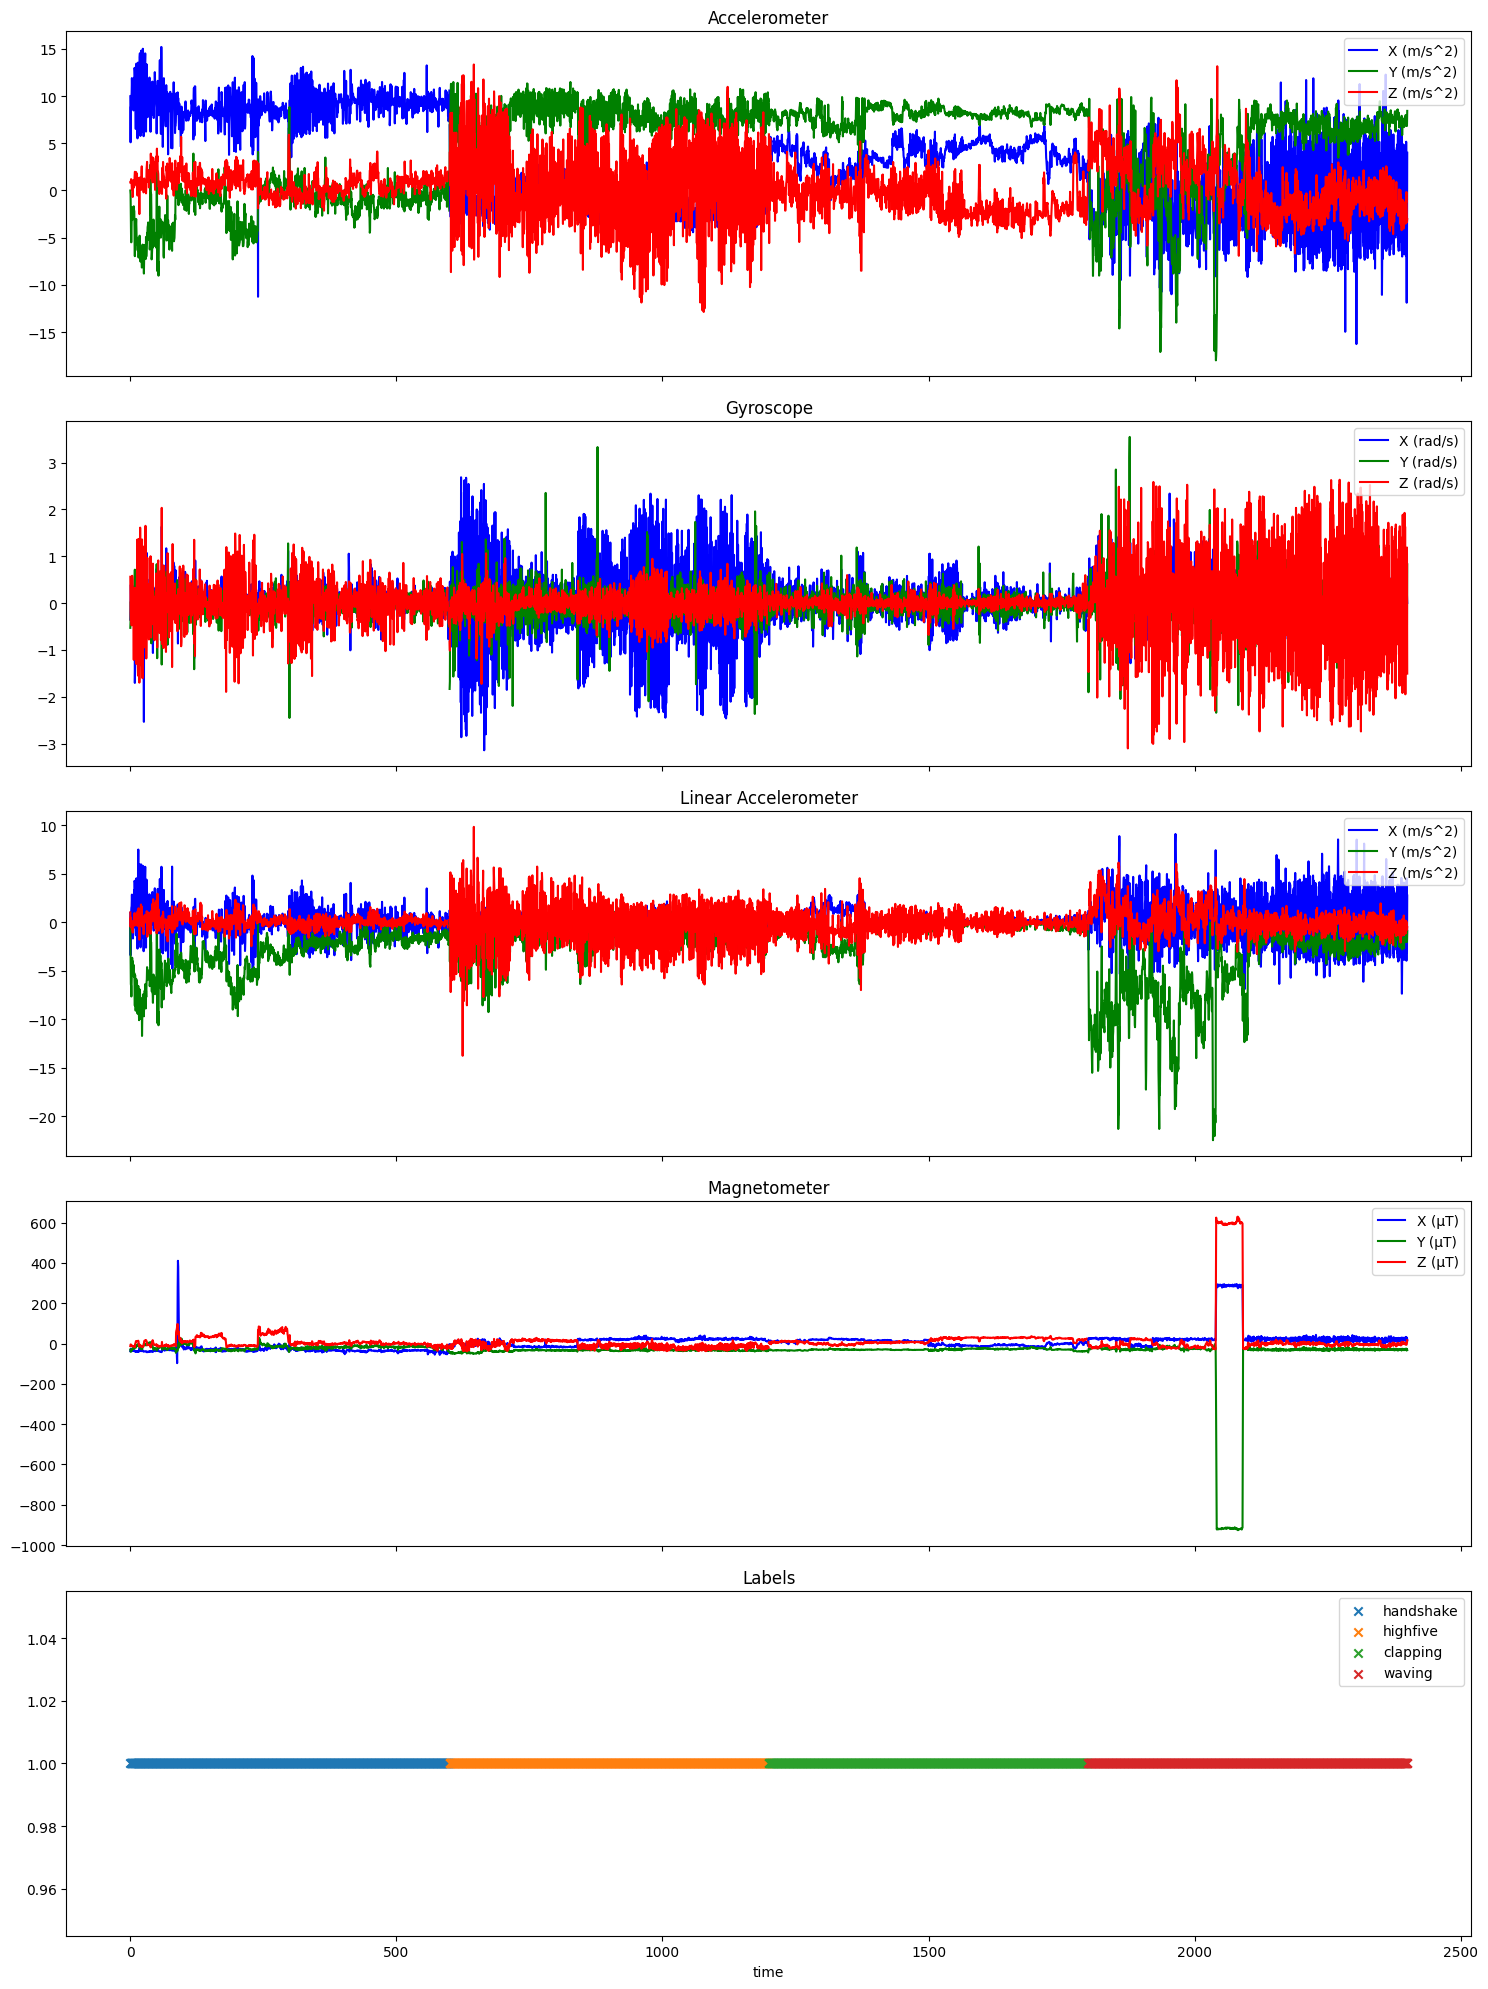

In [4]:
# Define the unique labels and base colors
unique_labels = combined_accel_data['label'].unique()
base_colors = sns.color_palette(n_colors=len(unique_labels))

# Map labels to a single color
label_colors = {label: base_colors[i] for i, label in enumerate(unique_labels)}

# Define the colors for each axis
axis_colors = {'X': 'blue', 'Y': 'green', 'Z': 'red'}

def plot_combined_data():
    fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

    # Accelerometer data
    for label in unique_labels:
        label_data = combined_accel_data[combined_accel_data['label'] == label]
        axs[0].plot(label_data['time'], label_data['X (m/s^2)'], color=axis_colors['X'])
        axs[0].plot(label_data['time'], label_data['Y (m/s^2)'], color=axis_colors['Y'])
        axs[0].plot(label_data['time'], label_data['Z (m/s^2)'], color=axis_colors['Z'])
    axs[0].set_title('Accelerometer')
    axs[0].legend(['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], loc='upper right')

    # Gyroscope data
    for label in unique_labels:
        label_data = combined_gyro_data[combined_gyro_data['label'] == label]
        axs[1].plot(label_data['time'], label_data['X (rad/s)'], color=axis_colors['X'])
        axs[1].plot(label_data['time'], label_data['Y (rad/s)'], color=axis_colors['Y'])
        axs[1].plot(label_data['time'], label_data['Z (rad/s)'], color=axis_colors['Z'])
    axs[1].set_title('Gyroscope')
    axs[1].legend(['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'], loc='upper right')

    # Linear accelerometer data
    for label in unique_labels:
        label_data = combined_linear_accel_data[combined_linear_accel_data['label'] == label]
        axs[2].plot(label_data['time'], label_data['X (m/s^2)'], color=axis_colors['X'])
        axs[2].plot(label_data['time'], label_data['Y (m/s^2)'], color=axis_colors['Y'])
        axs[2].plot(label_data['time'], label_data['Z (m/s^2)'], color=axis_colors['Z'])
    axs[2].set_title('Linear Accelerometer')
    axs[2].legend(['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], loc='upper right')

    # Magnetometer data
    for label in unique_labels:
        label_data = combined_magnetometer_data[combined_magnetometer_data['label'] == label]
        axs[3].plot(label_data['time'], label_data['X (µT)'], color=axis_colors['X'])
        axs[3].plot(label_data['time'], label_data['Y (µT)'], color=axis_colors['Y'])
        axs[3].plot(label_data['time'], label_data['Z (µT)'], color=axis_colors['Z'])
    axs[3].set_title('Magnetometer')
    axs[3].legend(['X (µT)', 'Y (µT)', 'Z (µT)'], loc='upper right')

    # Labels over time
    for label in unique_labels:
        label_data = combined_accel_data[combined_accel_data['label'] == label]
        axs[4].scatter(label_data['time'], [1]*len(label_data), label=label, color=label_colors[label], marker='x')
    axs[4].set_title('Labels')
    axs[4].legend(loc='upper right')

    plt.xlabel('time')
    plt.tight_layout()
    plt.show()

plot_combined_data()

# Correlation Matrix

Accelerometer Correlation Heatmap:


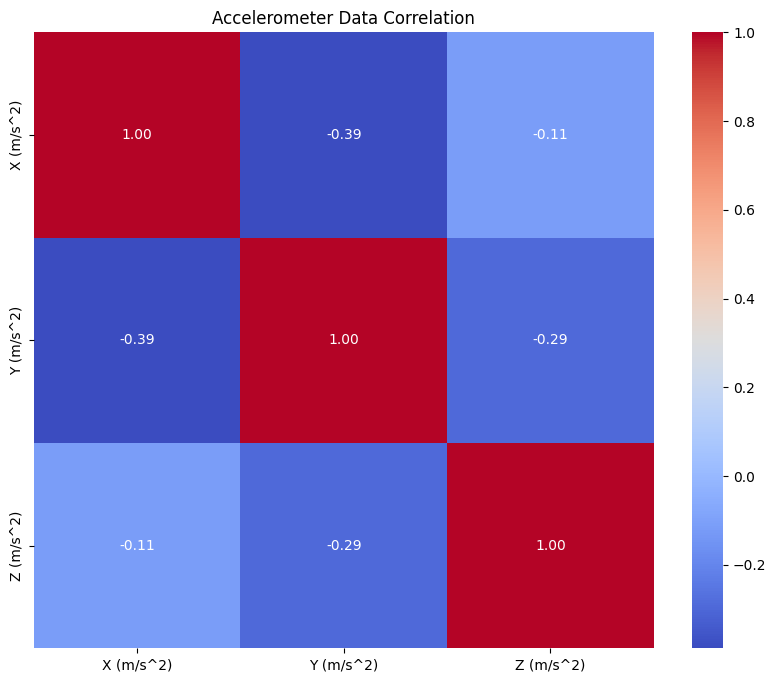

Gyroscope Correlation Heatmap:


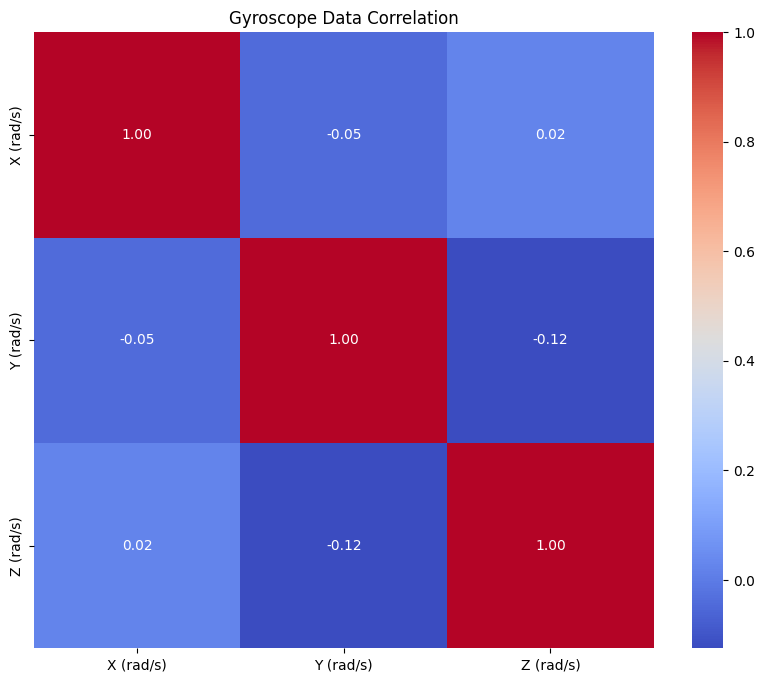

Linear Accelerometer Correlation Heatmap:


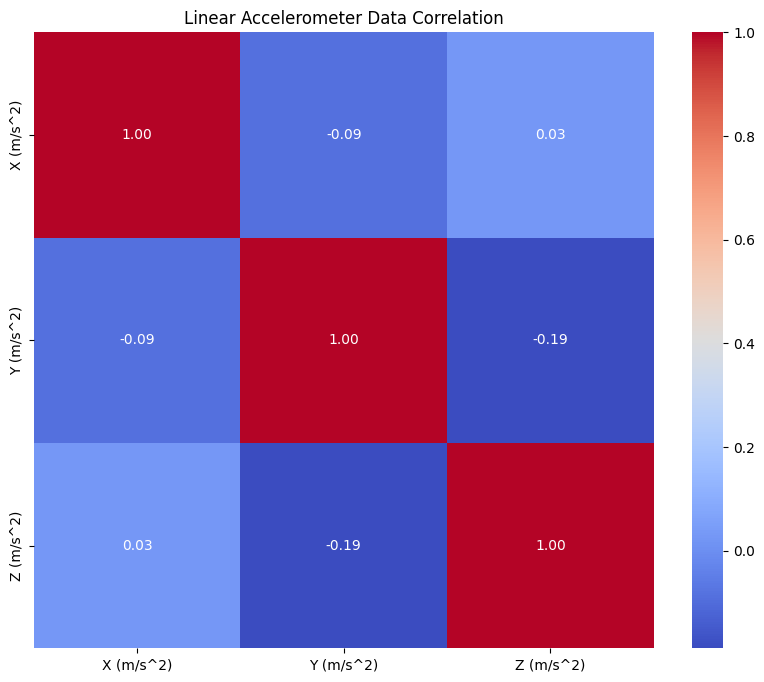

Magnetometer Correlation Heatmap:


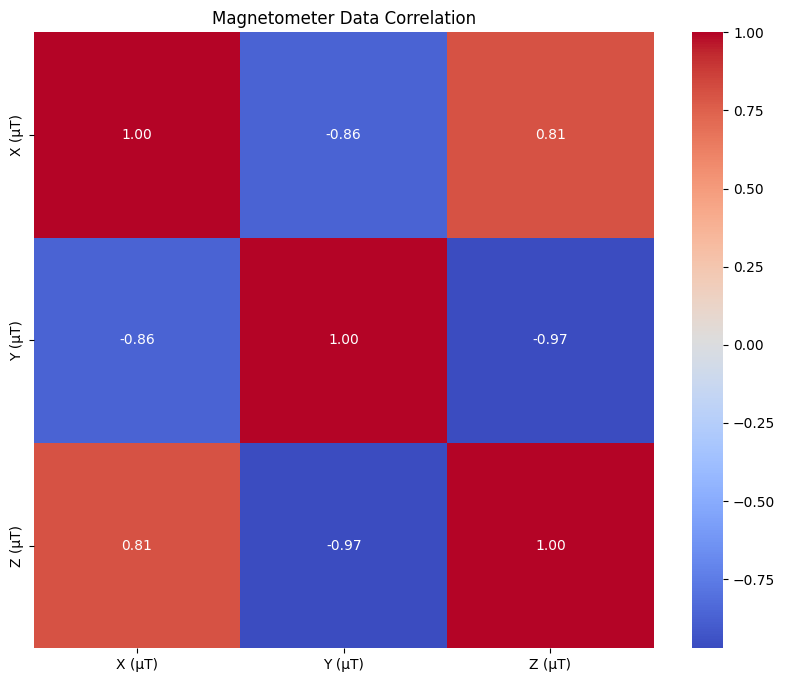

Combined Sensor Data Correlation Heatmap:


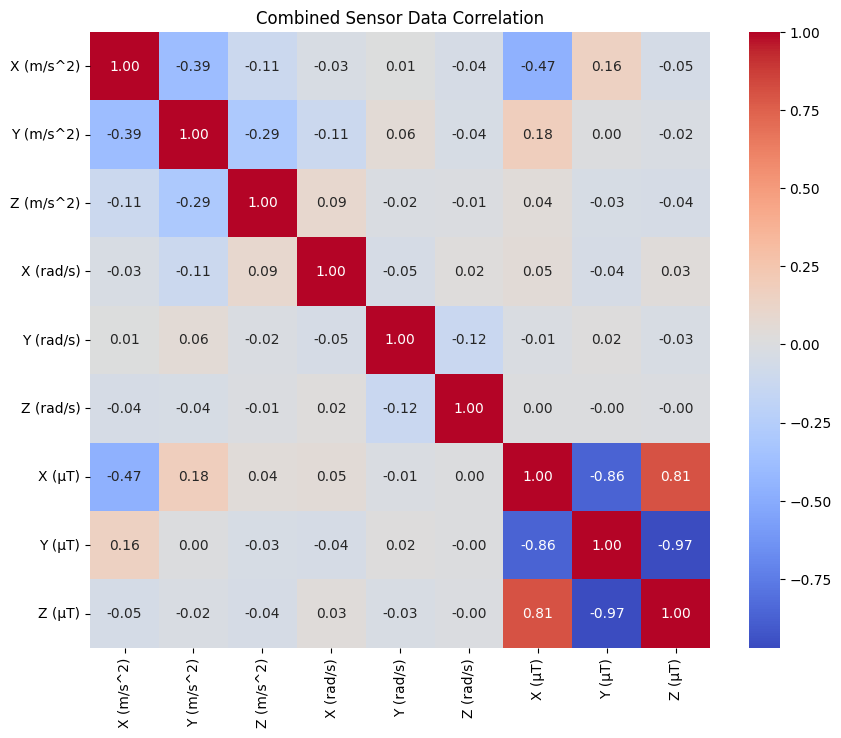

In [5]:

def plot_correlation_heatmap(data, title):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# Accelerometer correlation heatmap
print("Accelerometer Correlation Heatmap:")
plot_correlation_heatmap(combined_accel_data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']], 'Accelerometer Data Correlation')

# Gyroscope correlation heatmap
print("Gyroscope Correlation Heatmap:")
plot_correlation_heatmap(combined_gyro_data[['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)']], 'Gyroscope Data Correlation')

# Linear Accelerometer correlation heatmap
print("Linear Accelerometer Correlation Heatmap:")
plot_correlation_heatmap(combined_linear_accel_data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']], 'Linear Accelerometer Data Correlation')

# Magnetometer correlation heatmap
print("Magnetometer Correlation Heatmap:")
plot_correlation_heatmap(combined_magnetometer_data[['X (µT)', 'Y (µT)', 'Z (µT)']], 'Magnetometer Data Correlation')

# Combine all the sensor data into a single DataFrame for correlation analysis
combined_data = pd.concat([
    combined_accel_data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']],
    combined_gyro_data[['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)']],
    combined_linear_accel_data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']],
    combined_magnetometer_data[['X (µT)', 'Y (µT)', 'Z (µT)']]
], axis=1)

# Drop the duplicate 'time' columns after concatenation
combined_data = combined_data.loc[:,~combined_data.columns.duplicated()]

# Combined correlation heatmap
print("Combined Sensor Data Correlation Heatmap:")
plot_correlation_heatmap(combined_data, 'Combined Sensor Data Correlation')


# Normality Check

Accelerometer Data Normality Check:


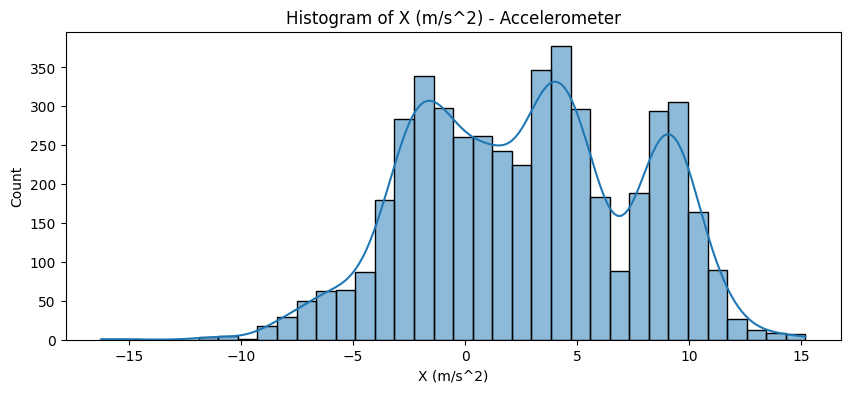

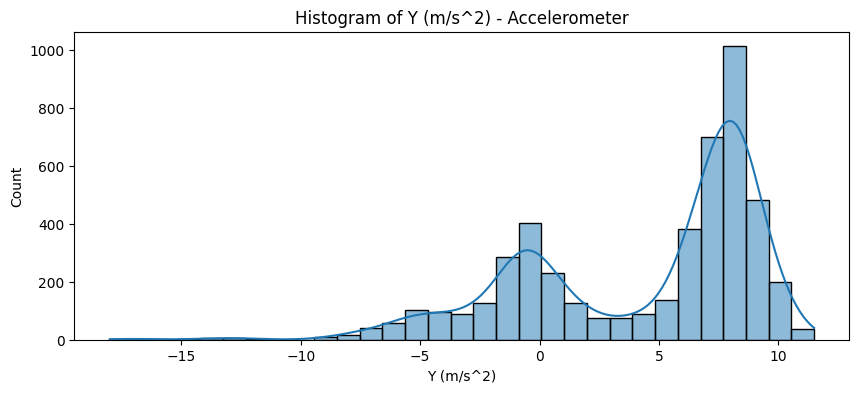

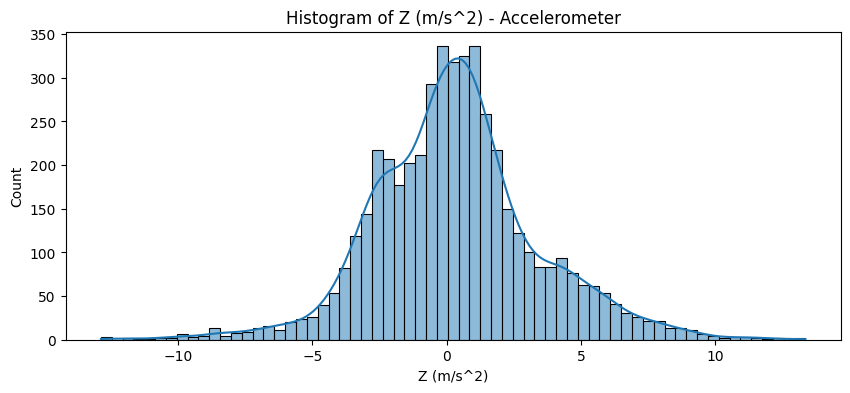

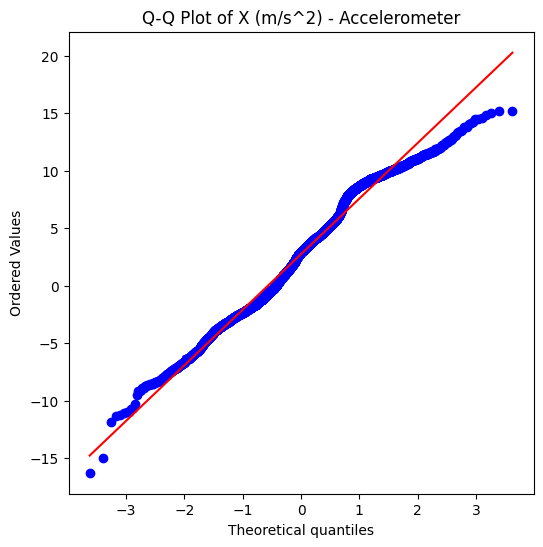

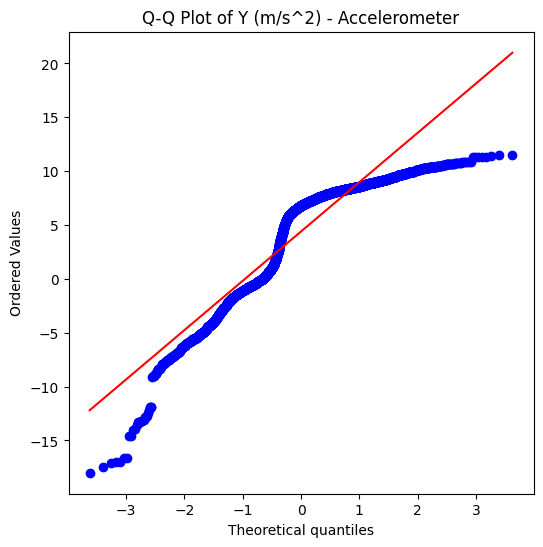

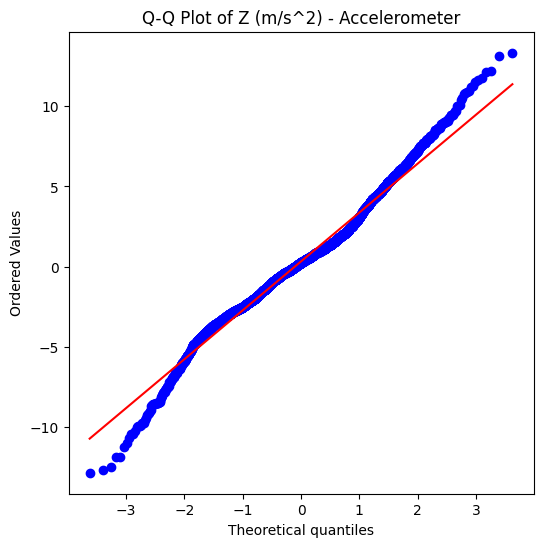

Shapiro-Wilk Test for X (m/s^2) - Accelerometer: Statistics=9.832e-01, p=1.838e-23
X (m/s^2) - Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (m/s^2) - Accelerometer: Statistics=8.708e-01, p=0.000e+00
Y (m/s^2) - Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (m/s^2) - Accelerometer: Statistics=9.826e-01, p=7.163e-24
Z (m/s^2) - Accelerometer does not look Gaussian (reject H0)

Gyroscope Data Normality Check:


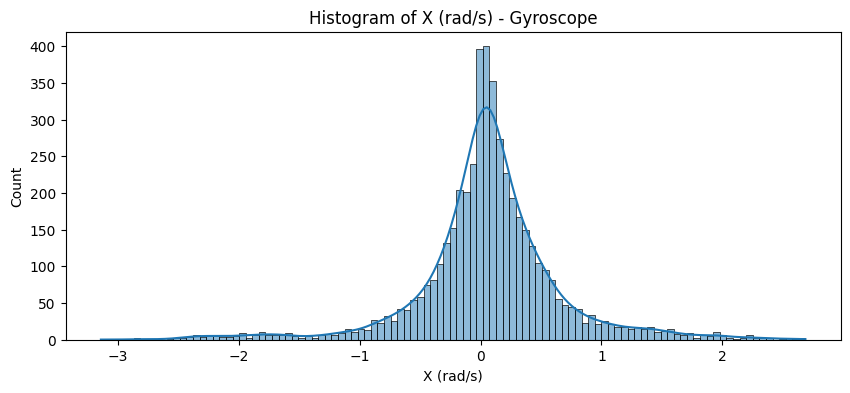

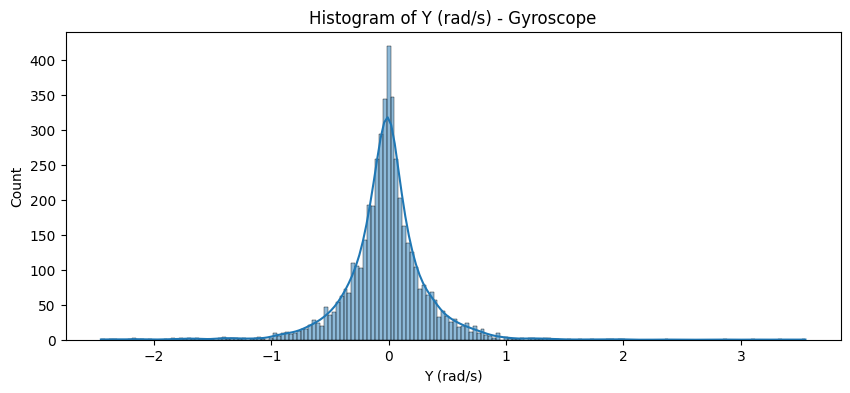

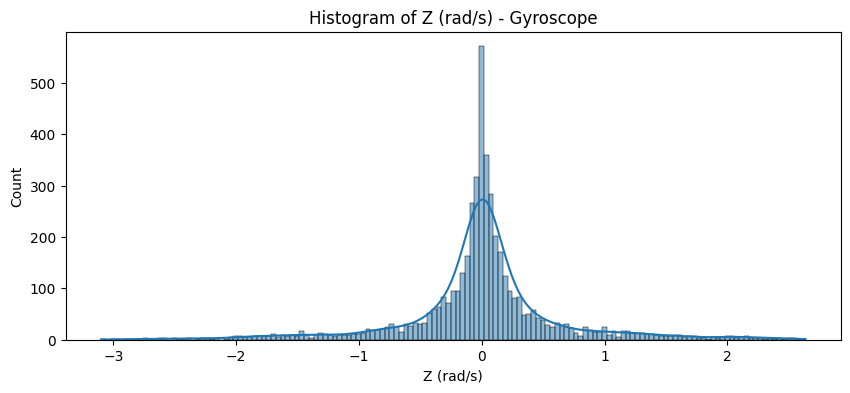

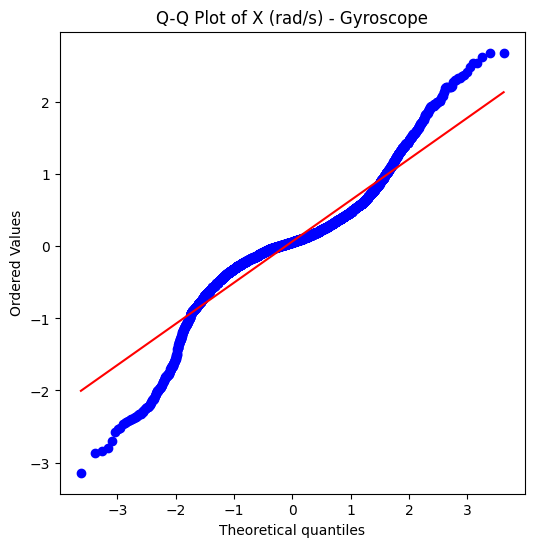

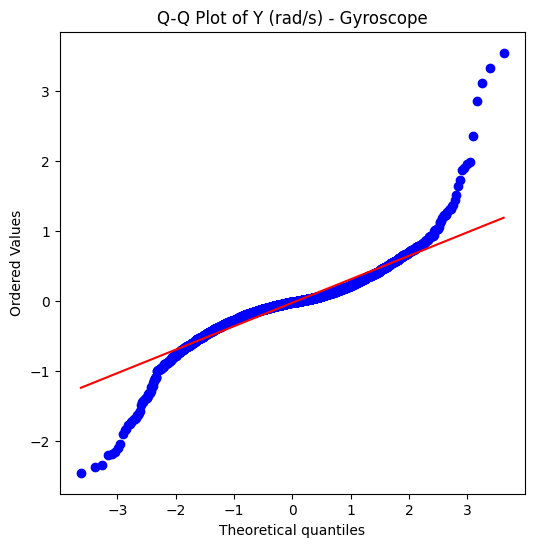

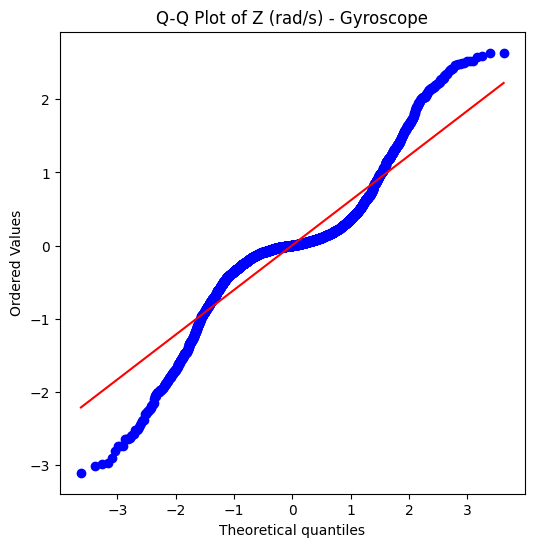

Shapiro-Wilk Test for X (rad/s) - Gyroscope: Statistics=9.065e-01, p=0.000e+00
X (rad/s) - Gyroscope does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (rad/s) - Gyroscope: Statistics=8.814e-01, p=0.000e+00
Y (rad/s) - Gyroscope does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (rad/s) - Gyroscope: Statistics=8.715e-01, p=0.000e+00
Z (rad/s) - Gyroscope does not look Gaussian (reject H0)

Linear Accelerometer Data Normality Check:


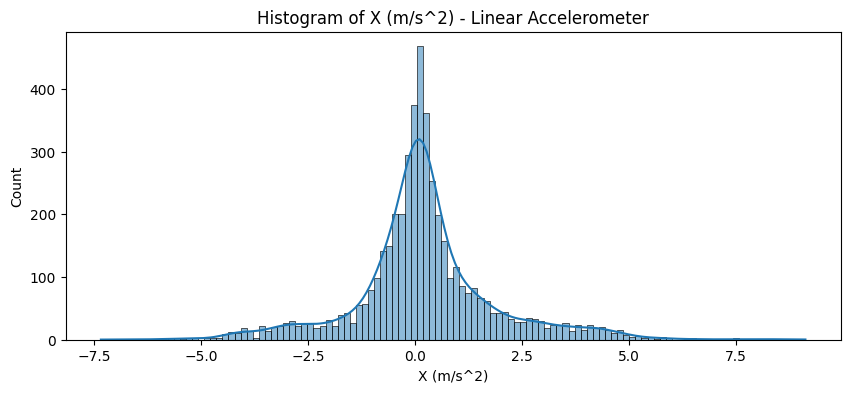

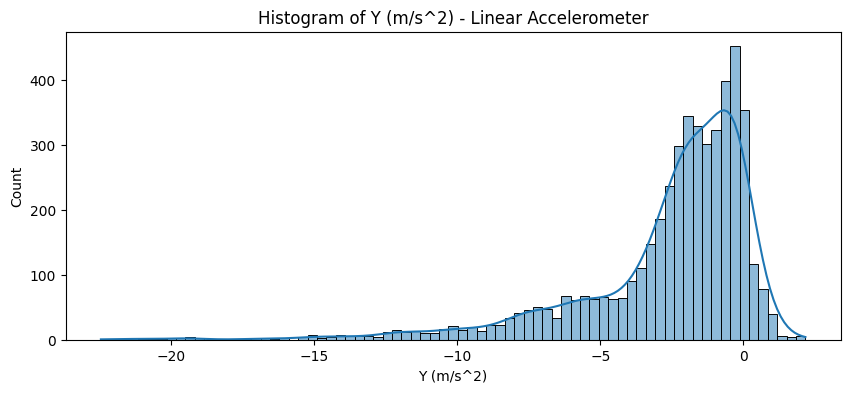

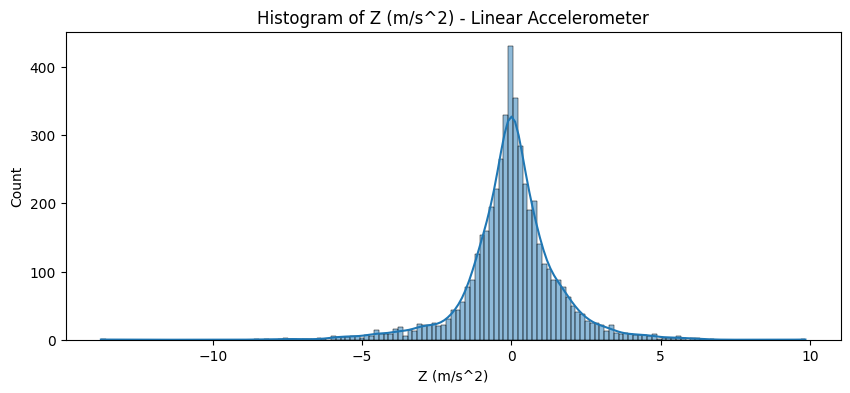

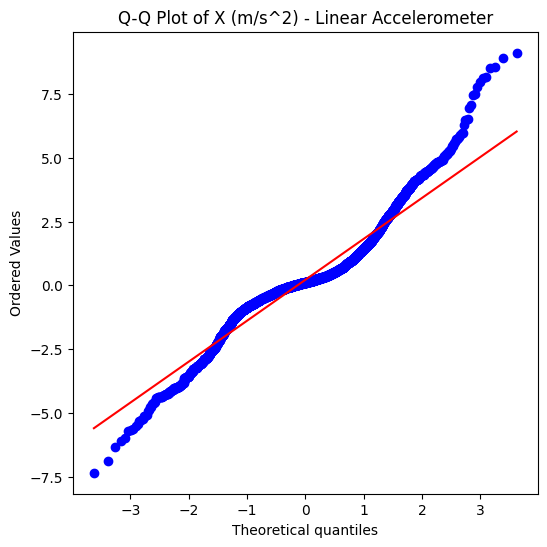

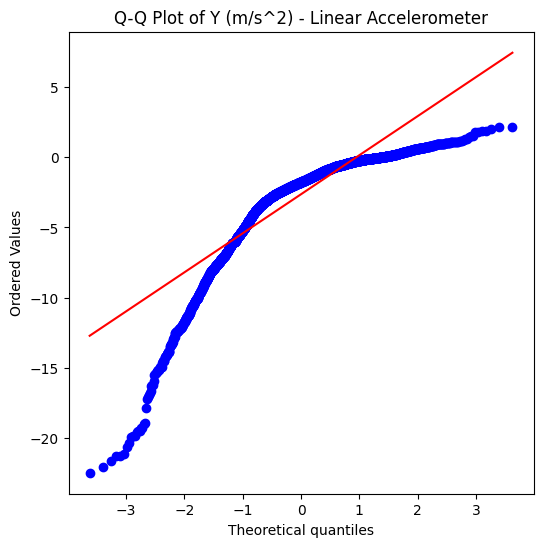

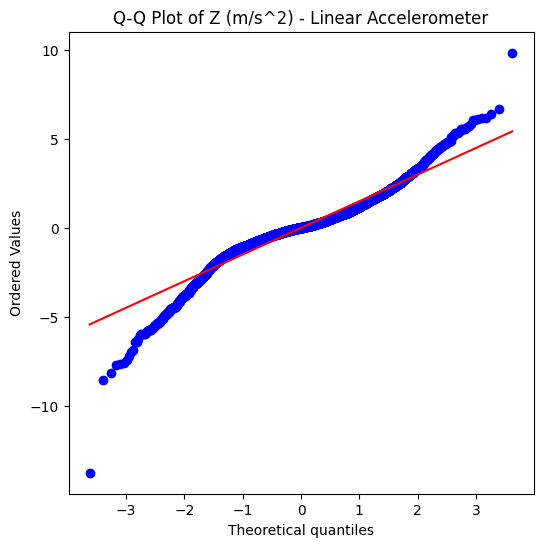

Shapiro-Wilk Test for X (m/s^2) - Linear Accelerometer: Statistics=9.294e-01, p=7.455e-43
X (m/s^2) - Linear Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (m/s^2) - Linear Accelerometer: Statistics=7.999e-01, p=0.000e+00
Y (m/s^2) - Linear Accelerometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (m/s^2) - Linear Accelerometer: Statistics=9.307e-01, p=1.462e-42
Z (m/s^2) - Linear Accelerometer does not look Gaussian (reject H0)

Magnetometer Data Normality Check:


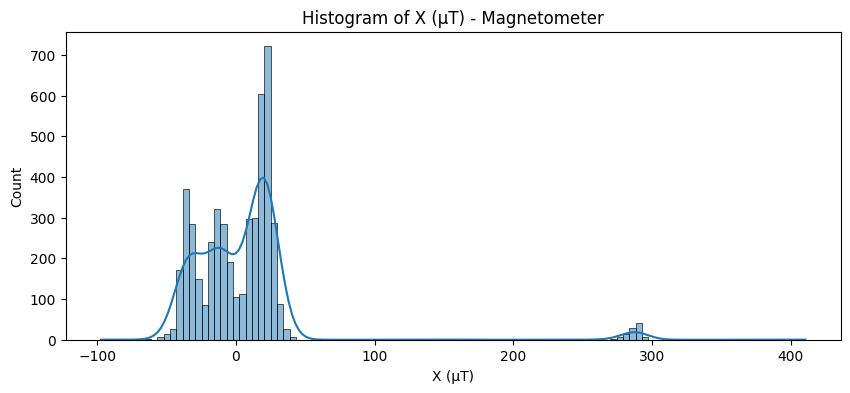

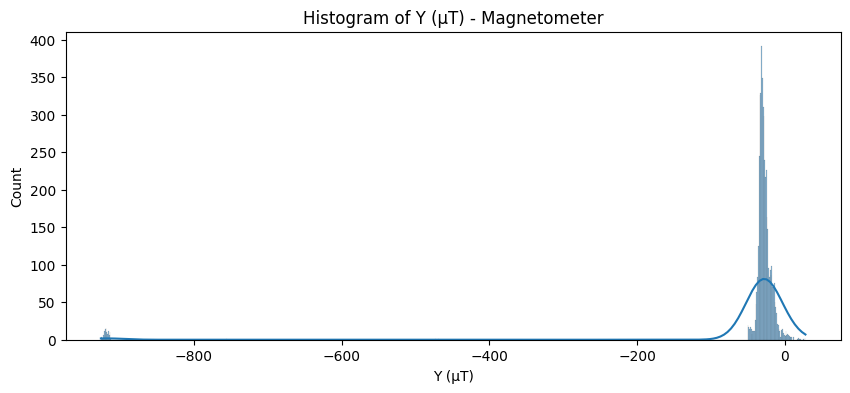

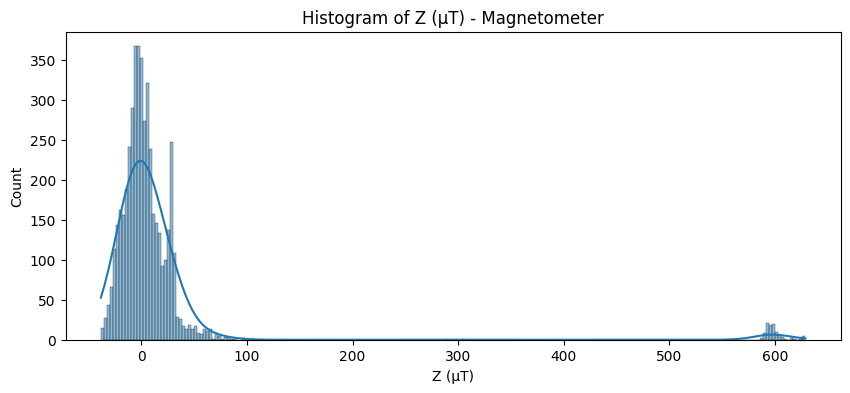

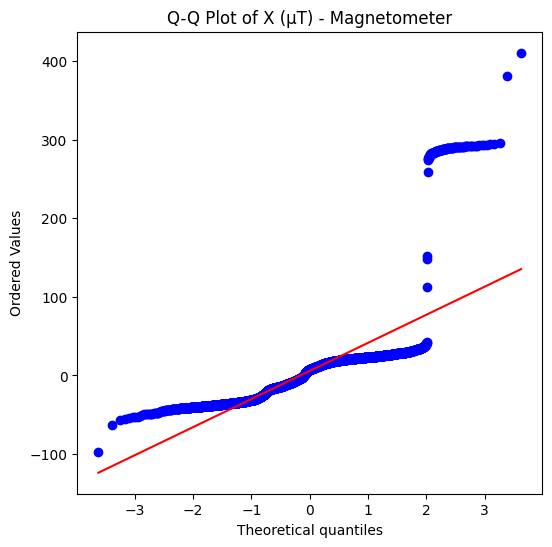

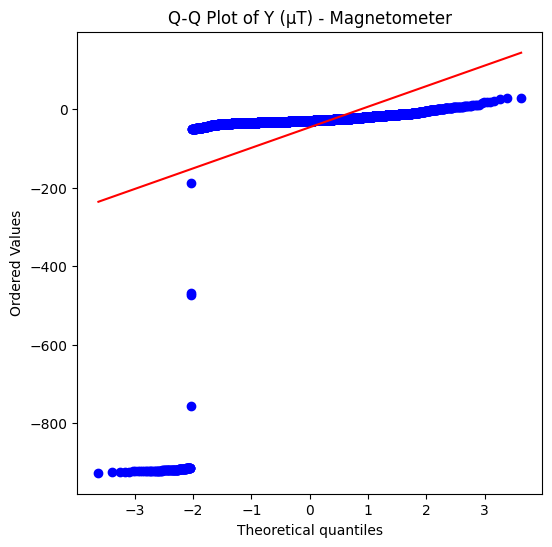

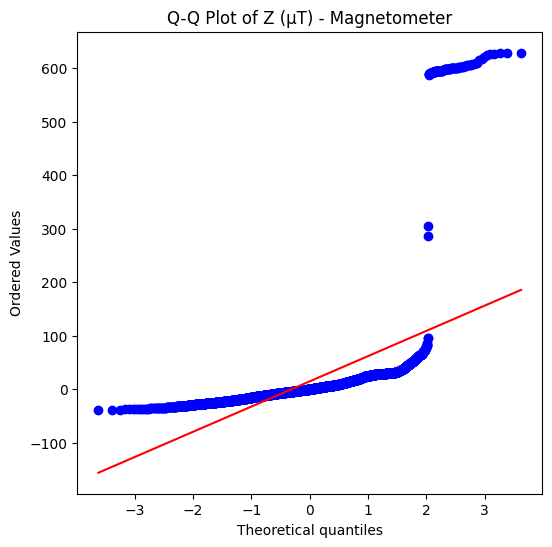

Shapiro-Wilk Test for X (µT) - Magnetometer: Statistics=5.527e-01, p=0.000e+00
X (µT) - Magnetometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Y (µT) - Magnetometer: Statistics=1.700e-01, p=0.000e+00
Y (µT) - Magnetometer does not look Gaussian (reject H0)
Shapiro-Wilk Test for Z (µT) - Magnetometer: Statistics=2.899e-01, p=0.000e+00
Z (µT) - Magnetometer does not look Gaussian (reject H0)


In [6]:
# Load the data from the 'All DATA' folder
base_path = '/Users/priyank/Desktop/ML4QS-project/Combined 40mins/Combined_40min_Data'
files = [
    'Combined_accelerometer_40min.csv',
    'Combined_gyroscope_40min.csv',
    'Combined_linear_accelerometer_40min.csv',
    'Combined_magnetometer_40min.csv'
]

# Function to load data
def load_data(base_path, filename):
    file_path = os.path.join(base_path, filename)
    return pd.read_csv(file_path)

# Load the combined data
accel_data = load_data(base_path, 'Combined_accelerometer_40min.csv')
gyro_data = load_data(base_path, 'Combined_gyroscope_40min.csv')
linear_accel_data = load_data(base_path, 'Combined_linear_accelerometer_40min.csv')
magnetometer_data = load_data(base_path, 'Combined_magnetometer_40min.csv')

# Function to plot histograms
def plot_histograms(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col} - {sensor}')
        plt.show()

# Function to plot Q-Q plots
def plot_qq(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(6, 6))
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {col} - {sensor}')
        plt.show()

# Function to perform Shapiro-Wilk Test
def shapiro_test(data, cols, sensor):
    for col in cols:
        stat, p = stats.shapiro(data[col])
        print(f'Shapiro-Wilk Test for {col} - {sensor}: Statistics={stat:.3e}, p={p:.3e}')
        if p > 0.05:
            print(f'{col} - {sensor} looks Gaussian (fail to reject H0)')
        else:
            print(f'{col} - {sensor} does not look Gaussian (reject H0)')

# Columns to check for normality for each sensor
columns = {
    'accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'gyroscope': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'linear_accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'magnetometer': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

# Perform checks on accelerometer data
print("Accelerometer Data Normality Check:")
plot_histograms(accel_data, columns['accelerometer'], 'Accelerometer')
plot_qq(accel_data, columns['accelerometer'], 'Accelerometer')
shapiro_test(accel_data, columns['accelerometer'], 'Accelerometer')

# Perform checks on gyroscope data
print("\nGyroscope Data Normality Check:")
plot_histograms(gyro_data, columns['gyroscope'], 'Gyroscope')
plot_qq(gyro_data, columns['gyroscope'], 'Gyroscope')
shapiro_test(gyro_data, columns['gyroscope'], 'Gyroscope')

# Perform checks on linear accelerometer data
print("\nLinear Accelerometer Data Normality Check:")
plot_histograms(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')
plot_qq(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')
shapiro_test(linear_accel_data, columns['linear_accelerometer'], 'Linear Accelerometer')

# Perform checks on magnetometer data
print("\nMagnetometer Data Normality Check:")
plot_histograms(magnetometer_data, columns['magnetometer'], 'Magnetometer')
plot_qq(magnetometer_data, columns['magnetometer'], 'Magnetometer')
shapiro_test(magnetometer_data, columns['magnetometer'], 'Magnetometer')

# Outlier Check

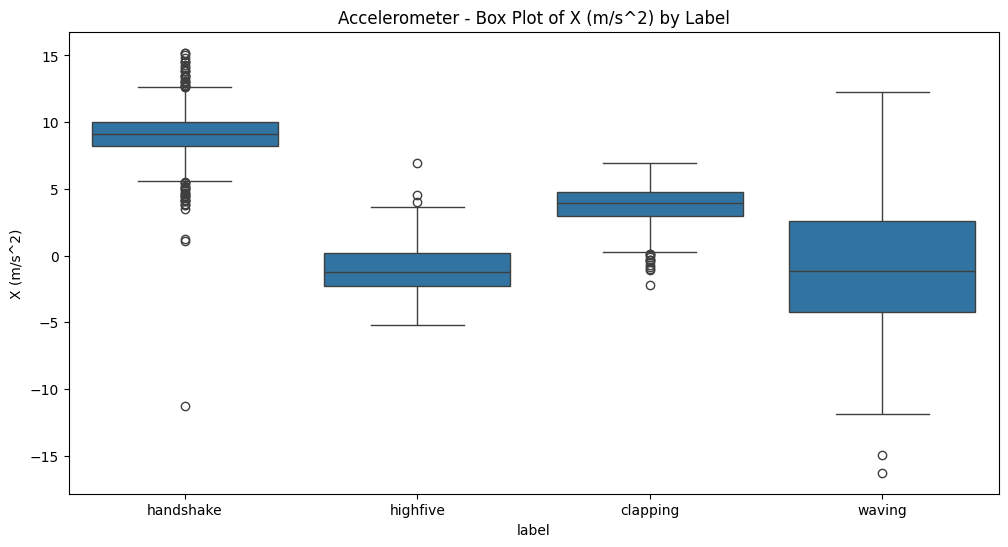

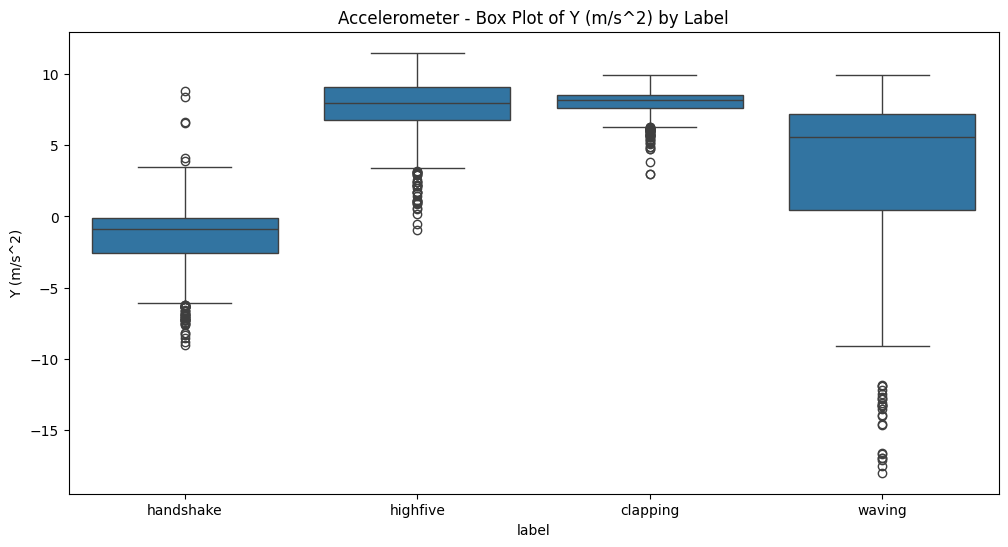

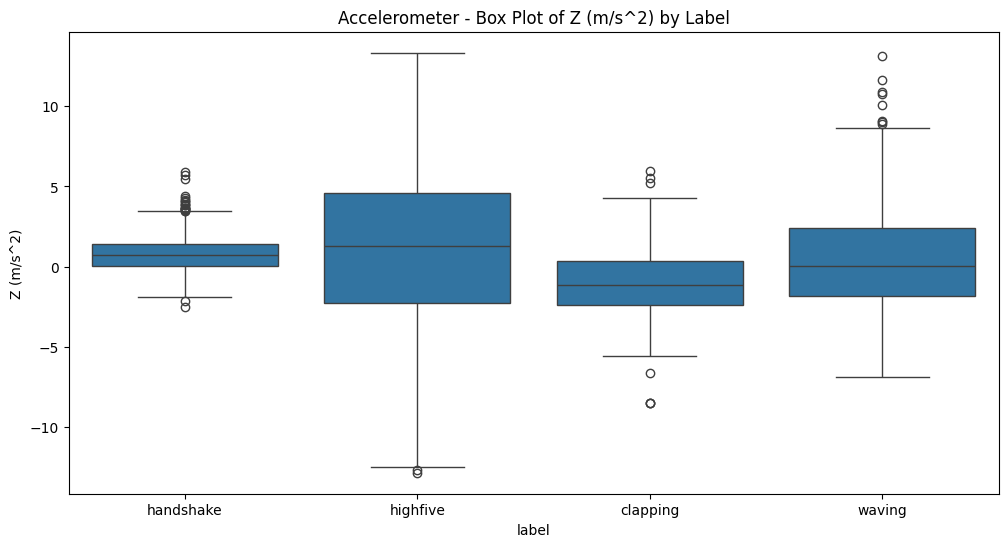

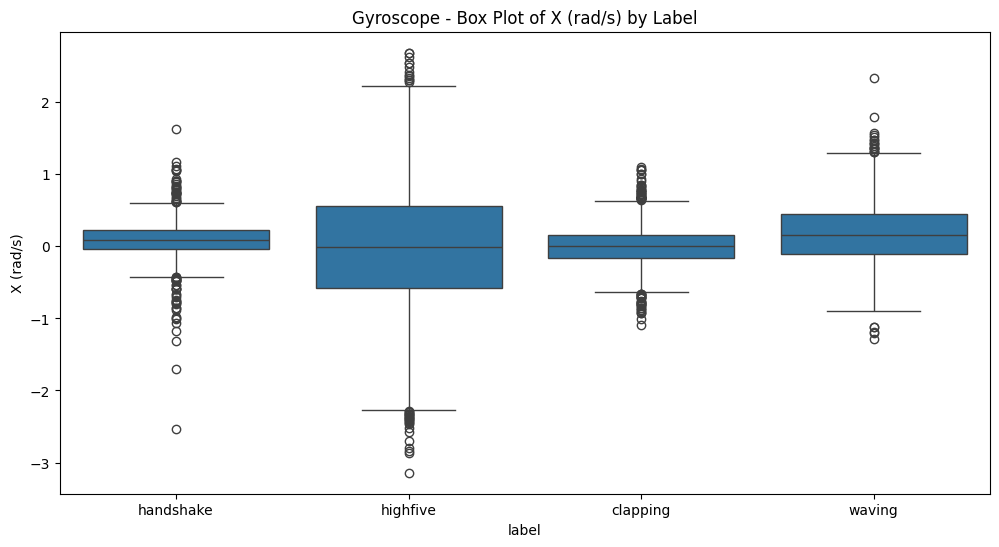

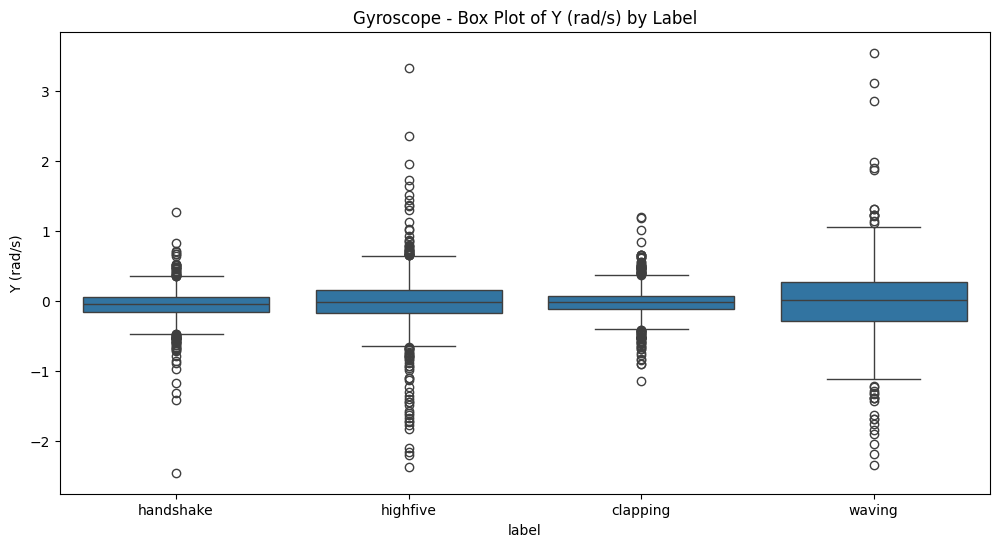

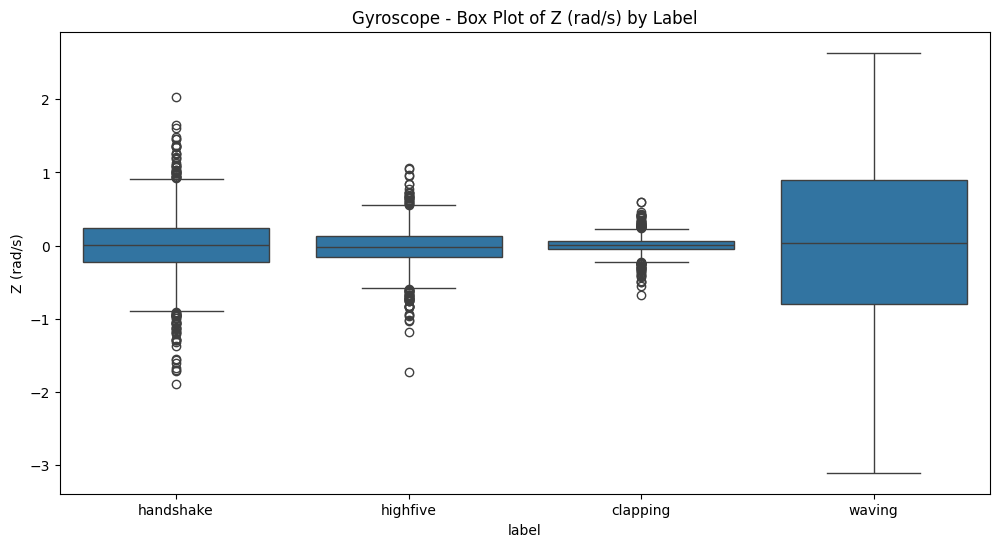

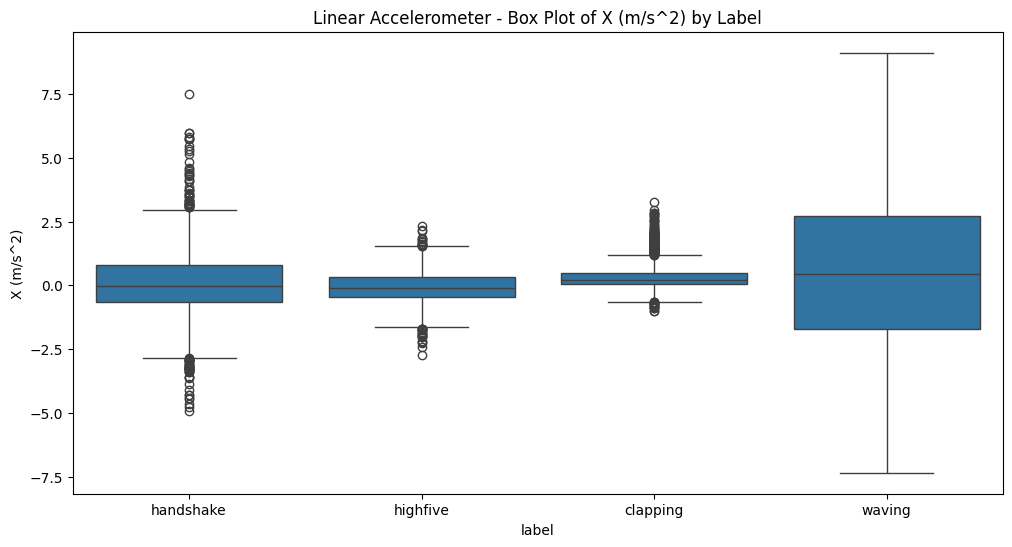

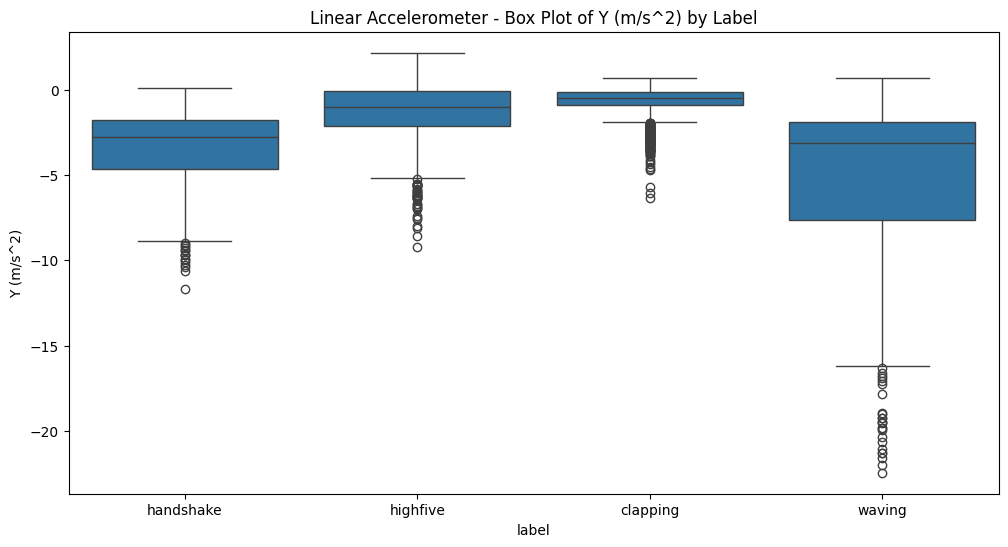

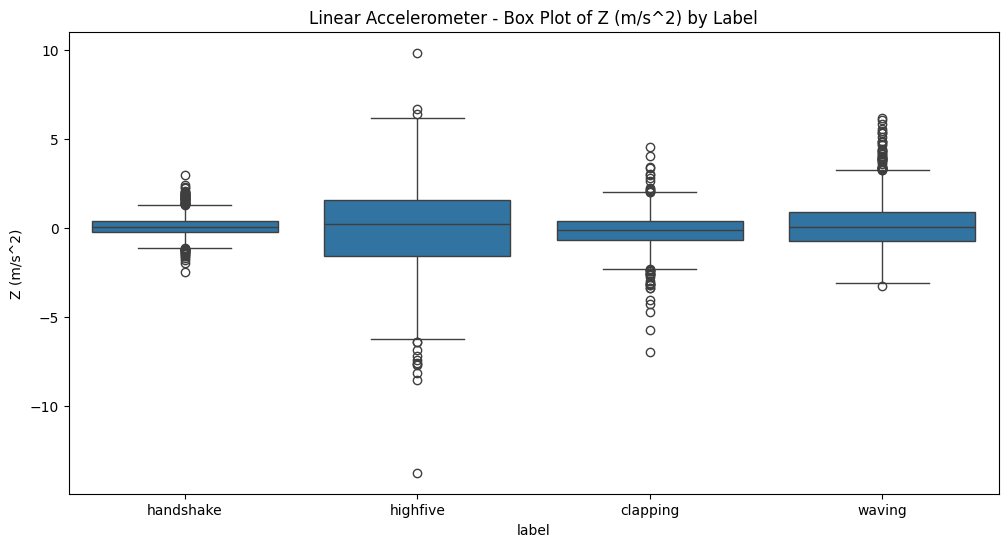

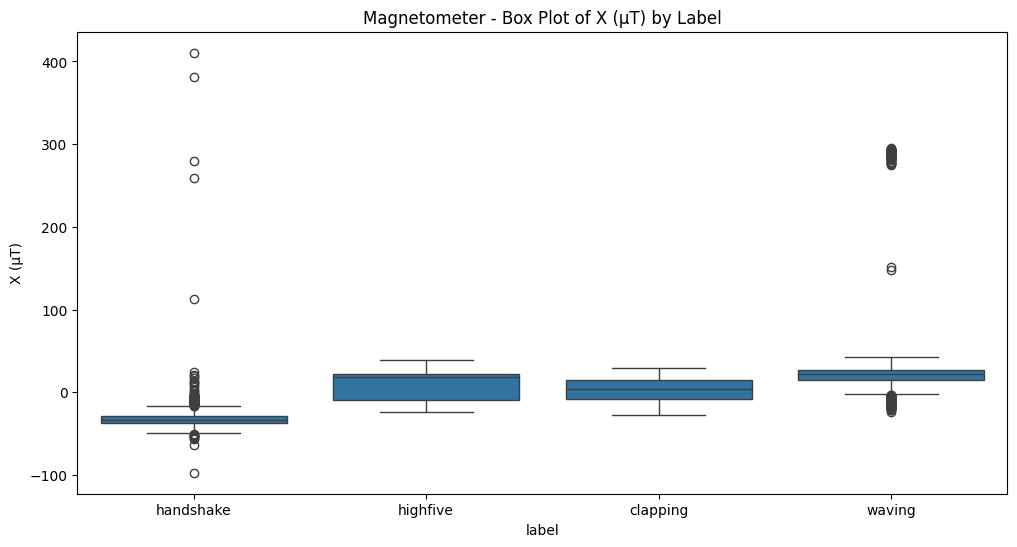

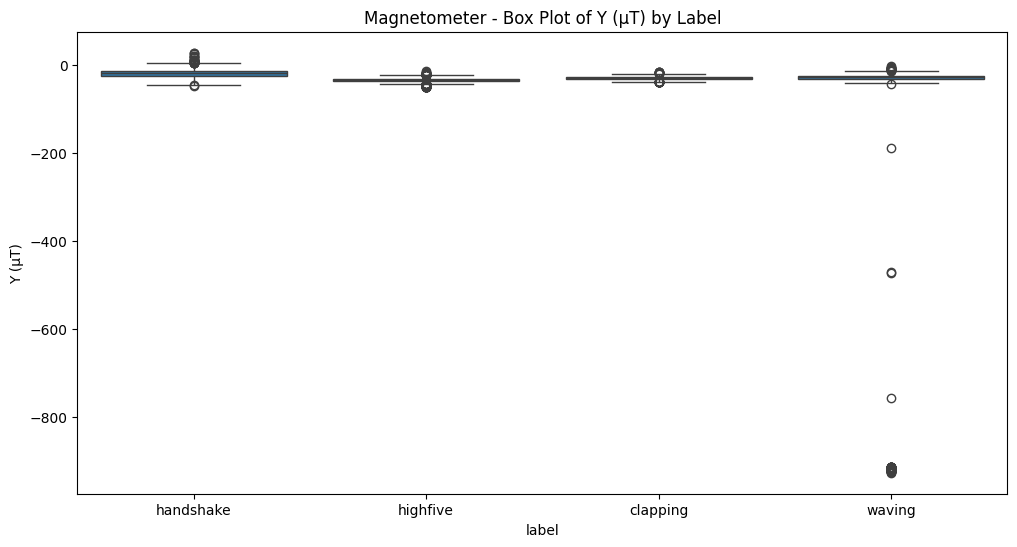

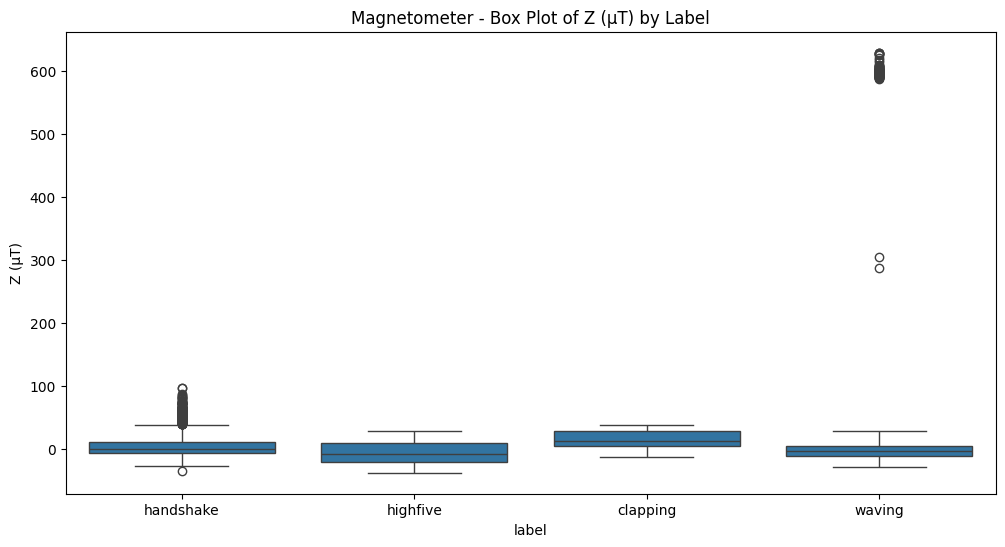

In [7]:
def plot_boxplots(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label', y=col, data=data)
        plt.title(f'{sensor} - Box Plot of {col} by Label')
        plt.show()

plot_boxplots(combined_accel_data, ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], 'Accelerometer')
plot_boxplots(combined_gyro_data, ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'], 'Gyroscope')
plot_boxplots(combined_linear_accel_data, ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], 'Linear Accelerometer')
plot_boxplots(combined_magnetometer_data, ['X (µT)', 'Y (µT)', 'Z (µT)'], 'Magnetometer')


# Anomaly Detection

In [8]:
from sklearn.ensemble import IsolationForest

In [9]:
file_names = {
    'accelerometer': 'Combined_accelerometer_40min.csv',
    'gyroscope': 'Combined_gyroscope_40min.csv',
    'linear_accelerometer': 'Combined_linear_accelerometer_40min.csv',
    'magnetometer': 'Combined_magnetometer_40min.csv'
}

# Load the datasets
def load_data(base_path, file_name):
    file_path = os.path.join(base_path, file_name)
    return pd.read_csv(file_path)

combined_accel_data = load_data(base_path, file_names['accelerometer'])
combined_gyro_data = load_data(base_path, file_names['gyroscope'])
combined_linear_accel_data = load_data(base_path, file_names['linear_accelerometer'])
combined_magnetometer_data = load_data(base_path, file_names['magnetometer'])

In [10]:
# Function to normalize data
def normalize_dataset(data, cols):
    for col in cols:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data

# Normalize the combined datasets
sensor_columns = {
    'accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'gyroscope': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'linear_accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'magnetometer': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

combined_accel_data = normalize_dataset(combined_accel_data, sensor_columns['accelerometer'])
combined_gyro_data = normalize_dataset(combined_gyro_data, sensor_columns['gyroscope'])
combined_linear_accel_data = normalize_dataset(combined_linear_accel_data, sensor_columns['linear_accelerometer'])
combined_magnetometer_data = normalize_dataset(combined_magnetometer_data, sensor_columns['magnetometer'])


In [11]:
# Function to apply Isolation Forest
def apply_isolation_forest(data, cols):
    iso_forest = IsolationForest(contamination=0.05)
    for col in cols:
        data['anomaly_' + col] = iso_forest.fit_predict(data[[col]])
        data['anomaly_' + col] = data['anomaly_' + col].apply(lambda x: 1 if x == -1 else 0)  # Convert to binary
    return data

# Apply Isolation Forest to each dataset
combined_accel_data = apply_isolation_forest(combined_accel_data, sensor_columns['accelerometer'])
combined_gyro_data = apply_isolation_forest(combined_gyro_data, sensor_columns['gyroscope'])
combined_linear_accel_data = apply_isolation_forest(combined_linear_accel_data, sensor_columns['linear_accelerometer'])
combined_magnetometer_data = apply_isolation_forest(combined_magnetometer_data, sensor_columns['magnetometer'])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not h

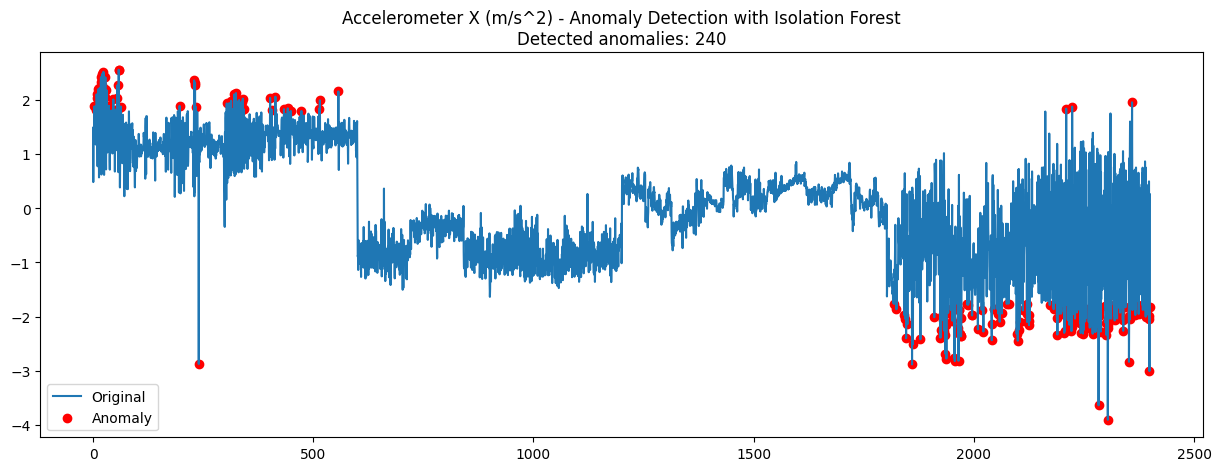

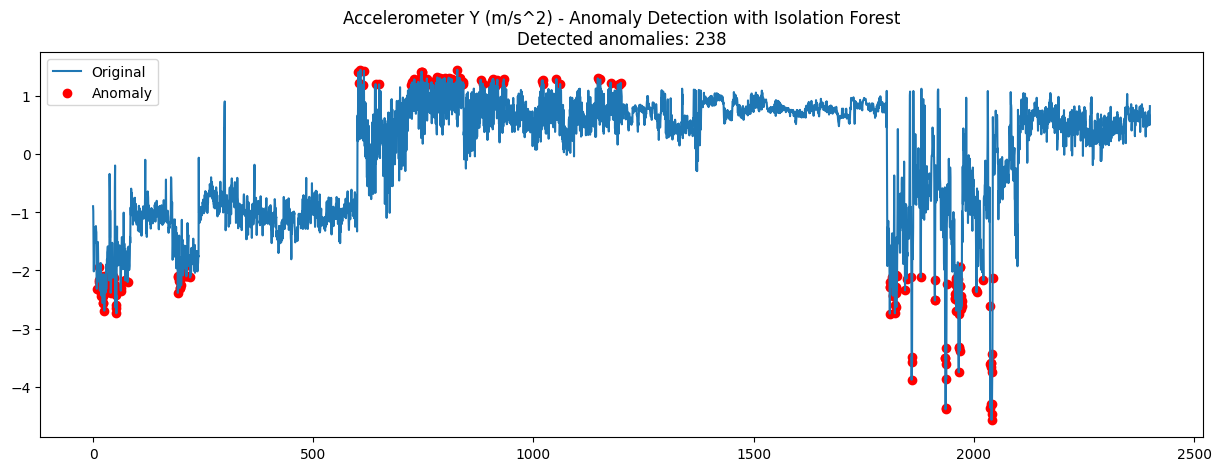

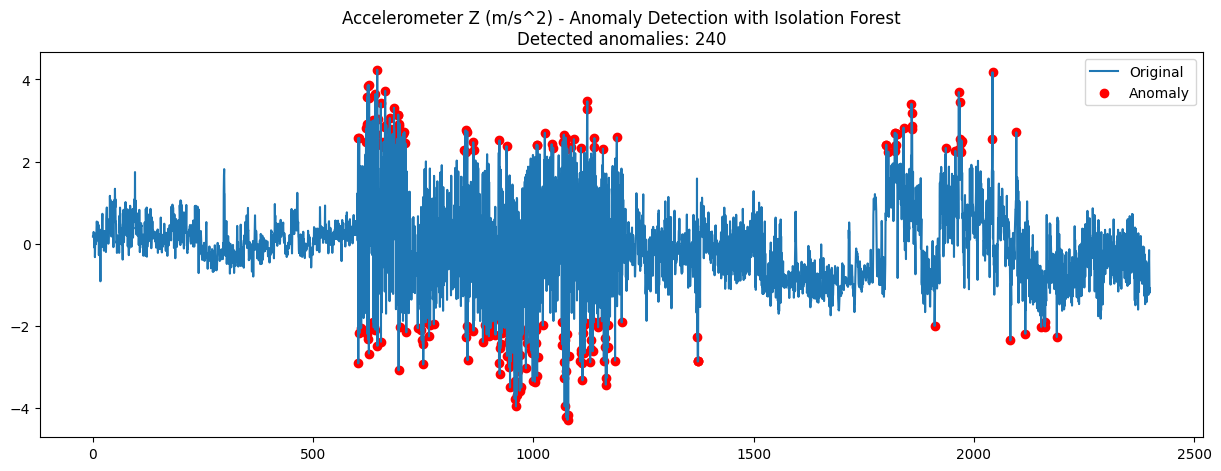

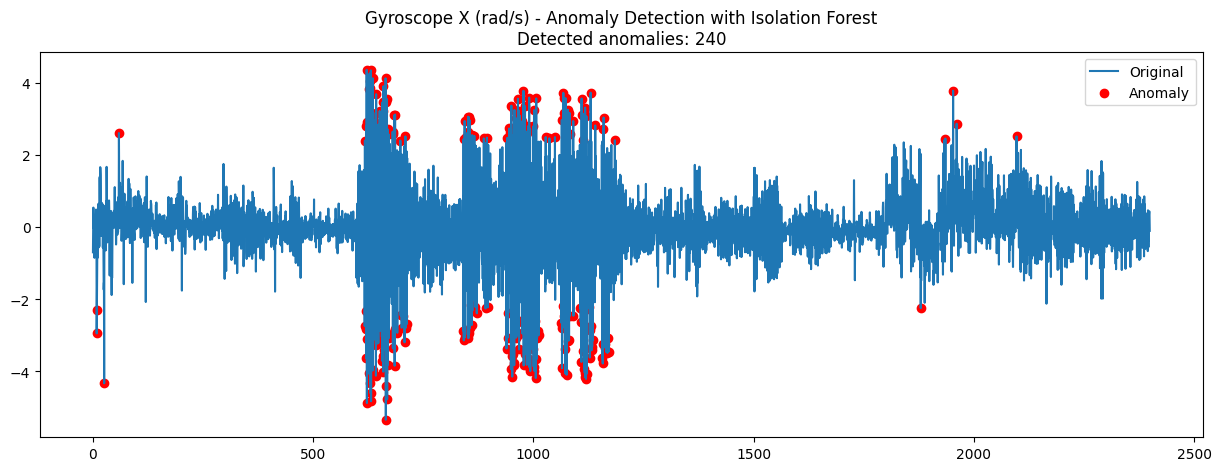

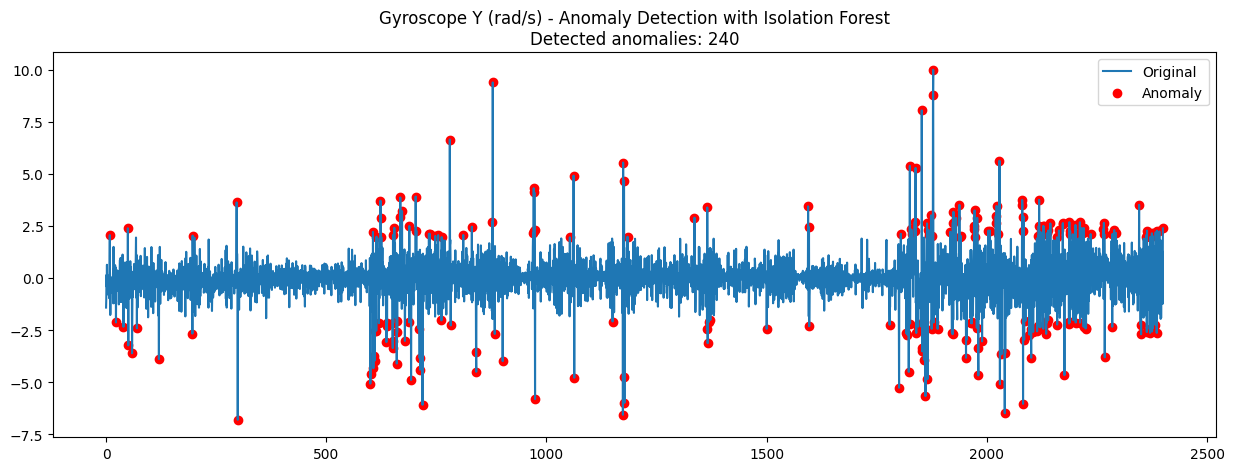

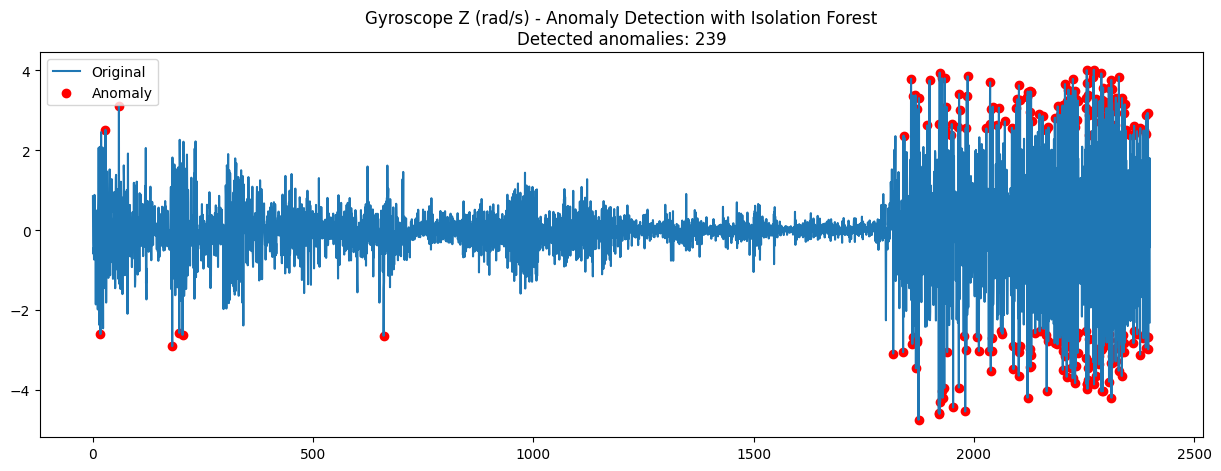

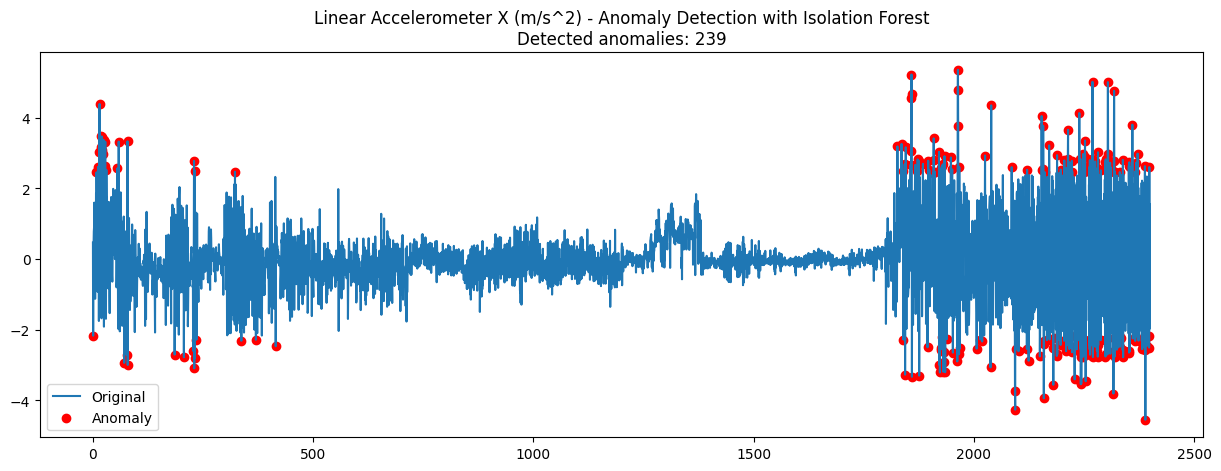

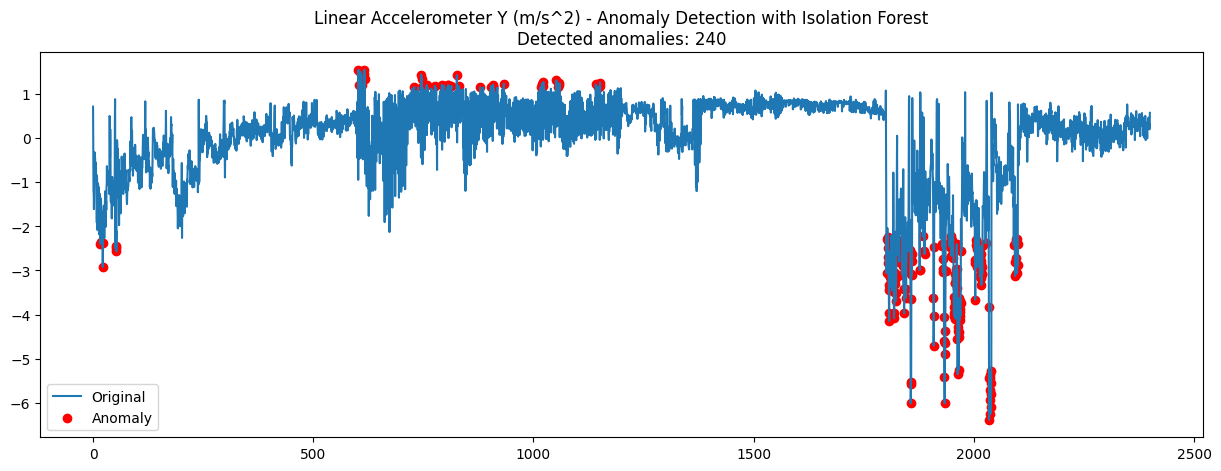

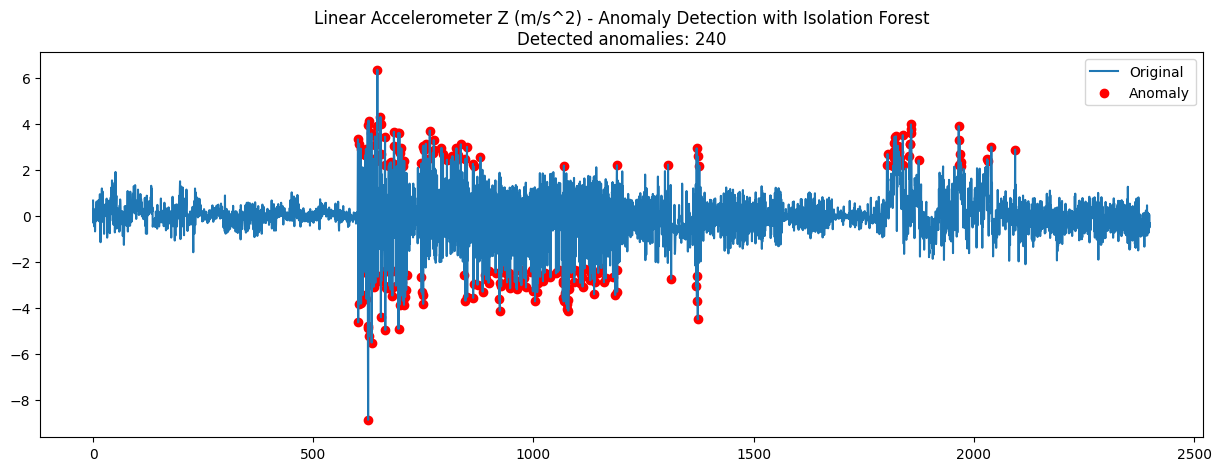

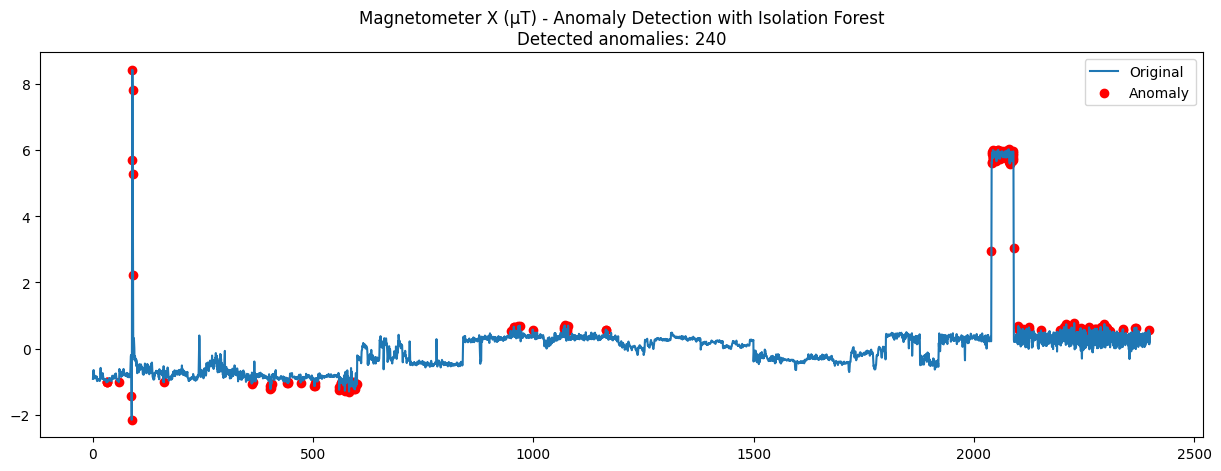

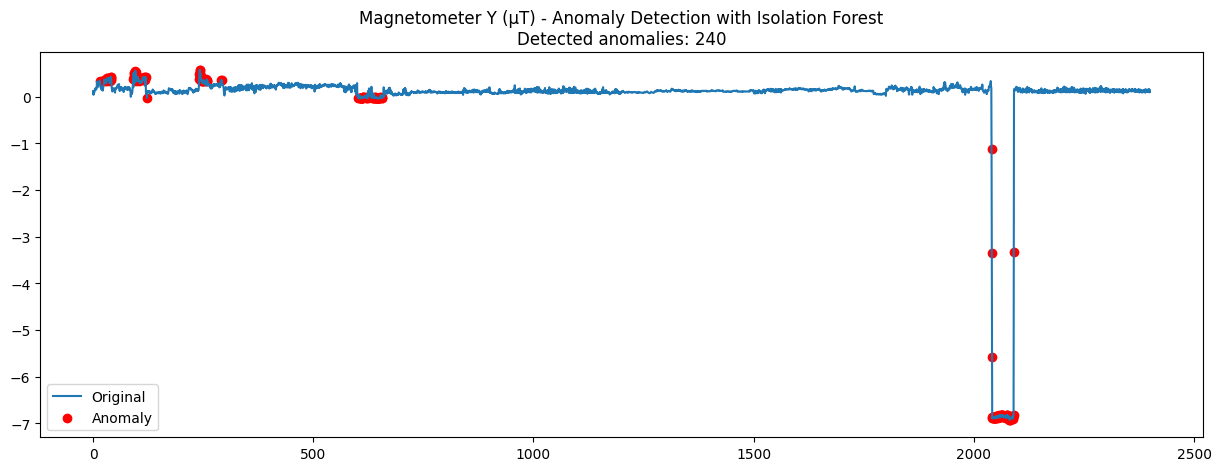

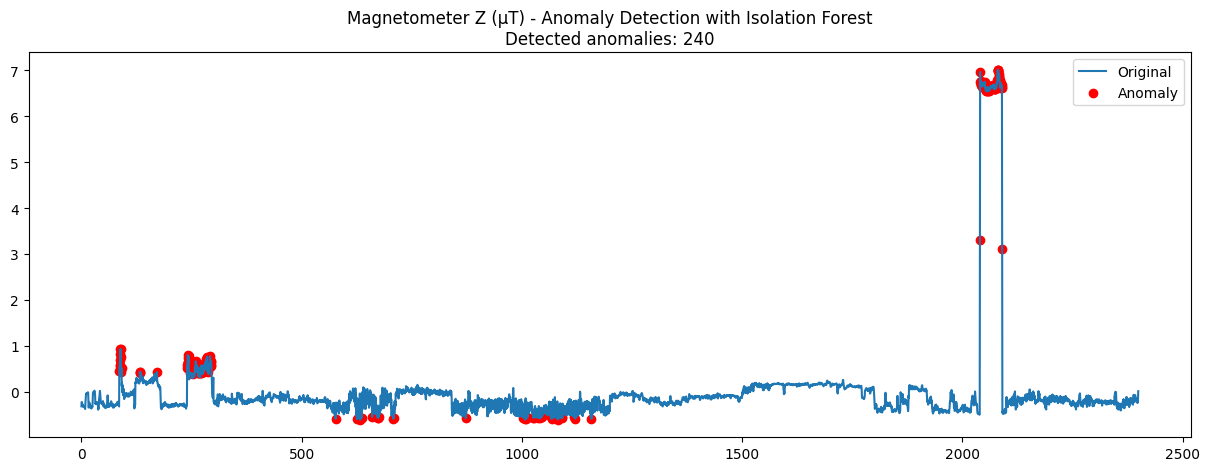

In [12]:
# Function to plot anomalies with count
def plot_anomalies(data, cols, sensor):
    for col in cols:
        plt.figure(figsize=(15, 5))
        plt.plot(data['time'], data[col], label='Original')
        anomaly_indices = data[data['anomaly_' + col] == 1].index
        plt.scatter(data.loc[anomaly_indices, 'time'], data.loc[anomaly_indices, col], color='red', label='Anomaly')
        anomaly_count = len(anomaly_indices)
        plt.title(f'{sensor} {col} - Anomaly Detection with Isolation Forest\nDetected anomalies: {anomaly_count}')
        plt.legend()
        plt.show()

# Plot anomalies for accelerometer
plot_anomalies(combined_accel_data, sensor_columns['accelerometer'], 'Accelerometer')

# Plot anomalies for gyroscope
plot_anomalies(combined_gyro_data, sensor_columns['gyroscope'], 'Gyroscope')

# Plot anomalies for linear accelerometer
plot_anomalies(combined_linear_accel_data, sensor_columns['linear_accelerometer'], 'Linear Accelerometer')

# Plot anomalies for magnetometer
plot_anomalies(combined_magnetometer_data, sensor_columns['magnetometer'], 'Magnetometer')
